# Decision Tree Validation
---
> This one is all about using validation data to evaluate models that we build. The task asks us to make 3 alternative decision tree classifiers. I only know how to use the sklearn CART algorithm-based classifier so I'll look into it all

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization

from six import StringIO
import pydotplus
from IPython.display import Image

In [57]:
training_data = pd.DataFrame({"ID": np.arange(1, 17),
                             "AgeofDriver": [27, 19, 44, 31, 38, 51, 67, 35, 76, 47,49,21,29,25,55,30],
                             "AgeofLicence": [2,2,21,7,13,30,49,5,1,18,3,4,7,4,32,11],
                             "AgeofPolicy": [3,0,5,7,8,14,11,1,11,5,0,4,2,2,14,0],
                             "UnspentConvictions": [0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0],
                             "1stPartyClaims": [1,2,0,0,2,0,0,0,1,0,0,1,0,0,1,0],
                             "3rdPartyClaims": [0,0,0,0,1,4,2,0,1,1,0,3,0,2,0,0],
                             "NoClaimsProtection": np.array([1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1], dtype=bool),
                             "NoClaims": np.array([1,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0], dtype=bool),
                             "Experienced": np.array([0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1], dtype=bool),
                             "Good": np.array([0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1], dtype=bool)}).set_index("ID")

In [58]:
validation_data = pd.DataFrame({"ID": np.arange(25, 33),
                             "AgeofDriver": [24,58,35,17,37,21,77,61],
                             "AgeofLicence": [2,32,4,0,17,3,1,44],
                             "AgeofPolicy": [3,12,4,0,8,2,12,15],
                             "UnspentConvictions": np.array([1,0,0,0,1,0,0,0], dtype=bool),
                             "1stPartyClaims": [0,1,0,0,0,2,0,2],
                             "3rdPartyClaims": [0,0,1,0,1,0,0,2],
                             "NoClaimsProtection": np.array([0,1,0,1,0,1,1,1], dtype=bool),
                             "NoClaims": np.array([0,1,0,0,0,1,1,0], dtype=bool),
                             "Experienced": np.array([0,1,1,0,0,0,0,1], dtype=bool),
                             "Good": np.array([0,0,0,1,0,0,0,0], dtype=bool)}).set_index("ID")

### Parameter Tuning
> Turns out I've done this before, the hyperparameters are all the options in the DecisionTreeClassifier() constructor

In [59]:
X_train, y_train = training_data, training_data.iloc[:, 7:]
X_test, y_test = validation_data, validation_data.iloc[:, 7:]
X_train, X_test, y_train, y_test

(    AgeofDriver  AgeofLicence  AgeofPolicy  UnspentConvictions  \
 ID                                                               
 1            27             2            3                   0   
 2            19             2            0                   0   
 3            44            21            5                   1   
 4            31             7            7                   0   
 5            38            13            8                   0   
 6            51            30           14                   1   
 7            67            49           11                   0   
 8            35             5            1                   0   
 9            76             1           11                   0   
 10           47            18            5                   1   
 11           49             3            0                   0   
 12           21             4            4                   0   
 13           29             7            2                   

In [70]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': (1, 2, 3, 5),
    'min_samples_split': (3, 4, 5, 10),
    'min_samples_leaf': (3, 4, 1, 2, 5),
    'criterion': ('log_loss', 'gini', 'entropy')
}

clf = DecisionTreeClassifier(random_state=42) # Initialize a decision tree
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid)
grid_search.fit(X_train, y_train)

best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}\n{y_pred}")

Best parameters: {'criterion': 'log_loss', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
[[False False False]
 [False  True  True]
 [False  True False]
 [False False False]
 [False False False]
 [ True False False]
 [ True False False]
 [ True  True False]]


[Text(0.4090909090909091, 0.875, 'Experienced <= 0.5\nlog_loss = 0.884\nsamples = 16\nvalue = [[8, 8]\n[10, 6]\n[13, 3]]'),
 Text(0.18181818181818182, 0.625, 'NoClaims <= 0.5\nlog_loss = 0.324\nsamples = 10\nvalue = [[6, 4]\n[10, 0]\n[10, 0]]'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'log_loss = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]\n[6, 0]]'),
 Text(0.2727272727272727, 0.375, 'log_loss = 0.0\nsamples = 4\nvalue = [[0, 4]\n[4, 0]\n[4, 0]]'),
 Text(0.6363636363636364, 0.625, '3rdPartyClaims <= 0.5\nlog_loss = 0.639\nsamples = 6\nvalue = [[2, 4]\n[0, 6]\n[3, 3]]'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'AgeofLicence <= 9.0\nlog_loss = 0.306\nsamples = 3\nvalue = [[1, 2]\n[0, 3]\n[0, 3]]'),
 Text(0.36363636363636365, 0.125, 'log_loss = 0.0\nsamples = 2\nvalue = [[0, 2]\n[0, 2]\n[0, 2]]'),
 Text(0.5454545454545454, 0.125, 'log_loss = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[0, 1]]'),
 Text(0.8181818181818

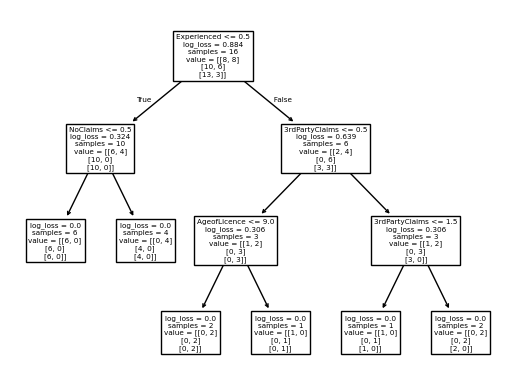

In [71]:
plot_tree(clf.set_params(**best_params).fit(X_train, y_train), feature_names=X_train.columns)